## Import modules


In [1]:
from data_access.firebase_fhir_data_access import FirebaseFHIRAccess
from data_flattening.fhir_resources_flattener import flatten_fhir_resources
from data_processing.data_processor import FHIRDataProcessor
from data_visualization.data_visualizer import DataVisualizer, visualizer_factory
from data_export.data_exporter import DataExporter

## Define credential files

In [5]:
# Define your Firebase project ID
project_id = "cs342-2023-paws" 

# Define the service account key file
service_account_key_file = "cs342-2023-paws-firebase-adminsdk-cz0fu-444bf65586.json"

# Define the collection name where your FHIR observations are stored and the input code if filtering is needed
collection_name = "users"
subcollection_name = "HealthKit"
loinc_codes = ["131328"] # "9052-2","8867-4", "131328"]

## Initialize the FirebaseFHIRAccess class using your Firebase credentials

In [6]:
firebase_access = FirebaseFHIRAccess(project_id, service_account_key_file)
firebase_access.connect()

fhir_observations = firebase_access.fetch_data(collection_name, subcollection_name, loinc_codes)

flattened_fhir_dataframe = flatten_fhir_resources(fhir_observations)

In [7]:
flattened_fhir_dataframe.df.tail()

,UserId,EffectiveDateTime,NumberOfMeasurements,SamplingFrequency,SamplingFrequencyUnit,ElectrocardiogramClassification,HeartRate,HeartRateUnit,QuantityName,LoincCode,Display,AppleHealthKitCode,ECGRecording1,ECGRecording2,ECGRecording3,ECGDataRecordingUnit
2,3EUoHxIuYkWMKcnLfK38nTGOqHn1,2023-03-12,15360.0,512.0,hertz,sinusRhythm,91.0,beats/minute,MDC_ECG_ELEC_POTL,HKElectrocardiogram,Electrocardiogram,131328,55.64010238647461 38.057743072509766 25.930093...,-75.20084381103516 -76.68766784667969 -78.3714...,-23.606388092041016 -27.381145477294922 -31.04...,uV
3,3EUoHxIuYkWMKcnLfK38nTGOqHn1,2023-03-15,15360.0,512.0,hertz,sinusRhythm,93.0,beats/minute,MDC_ECG_ELEC_POTL,HKElectrocardiogram,Electrocardiogram,131328,-41.743980407714844 -15.422901153564453 63.068...,1.8635940551757812 2.534306049346924 3.2126631...,-31.06991195678711 -33.56140899658203 -36.1100...,uV
4,3EUoHxIuYkWMKcnLfK38nTGOqHn1,2023-03-31,15360.0,512.0,hertz,sinusRhythm,84.0,beats/minute,MDC_ECG_ELEC_POTL,HKElectrocardiogram,Electrocardiogram,131328,-66.15603637695312 -38.35478210449219 -15.3711...,-75.3308334350586 -74.658935546875 -73.8541946...,-53.49078369140625 -54.618865966796875 -55.516...,uV
5,3EUoHxIuYkWMKcnLfK38nTGOqHn1,2023-03-15,15360.0,512.0,hertz,sinusRhythm,126.0,beats/minute,MDC_ECG_ELEC_POTL,HKElectrocardiogram,Electrocardiogram,131328,156.4628448486328 148.60504150390625 140.93119...,-119.76492309570312 -131.6258544921875 -144.21...,-35.414756774902344 -35.60380554199219 -35.727...,uV
6,3EUoHxIuYkWMKcnLfK38nTGOqHn1,2023-03-13,15360.0,512.0,hertz,sinusRhythm,111.0,beats/minute,MDC_ECG_ELEC_POTL,HKElectrocardiogram,Electrocardiogram,131328,29.9332275390625 24.39509391784668 18.64590263...,-36.99824523925781 -39.691009521484375 -42.233...,191.53823852539062 297.5498352050781 394.73974...,uV


## Apply basic processing for convenient data readability

In [5]:
processed_fhir_dataframe = FHIRDataProcessor().process_fhir_data(flattened_fhir_dataframe)
processed_fhir_dataframe.df.head()

,UserId,EffectiveDateTime,QuantityName,LoincCode,Display,AppleHealthKitCode,QuantityUnit,QuantityValue
0,3EUoHxIuYkWMKcnLfK38nTGOqHn1,2024-04-02,Heart Rate,8867-4,Heart rate,HKQuantityTypeIdentifierHeartRate,beats/minute,66.0
1,3EUoHxIuYkWMKcnLfK38nTGOqHn1,2024-04-02,Heart Rate,8867-4,Heart rate,HKQuantityTypeIdentifierHeartRate,beats/minute,65.0
2,3EUoHxIuYkWMKcnLfK38nTGOqHn1,2024-04-02,Heart Rate,8867-4,Heart rate,HKQuantityTypeIdentifierHeartRate,beats/minute,87.0
3,3EUoHxIuYkWMKcnLfK38nTGOqHn1,2024-04-02,Heart Rate,8867-4,Heart rate,HKQuantityTypeIdentifierHeartRate,beats/minute,66.0
4,3EUoHxIuYkWMKcnLfK38nTGOqHn1,2024-04-02,Heart Rate,8867-4,Heart rate,HKQuantityTypeIdentifierHeartRate,beats/minute,69.0


## Visualize Data

### HealthKit Quantity Example

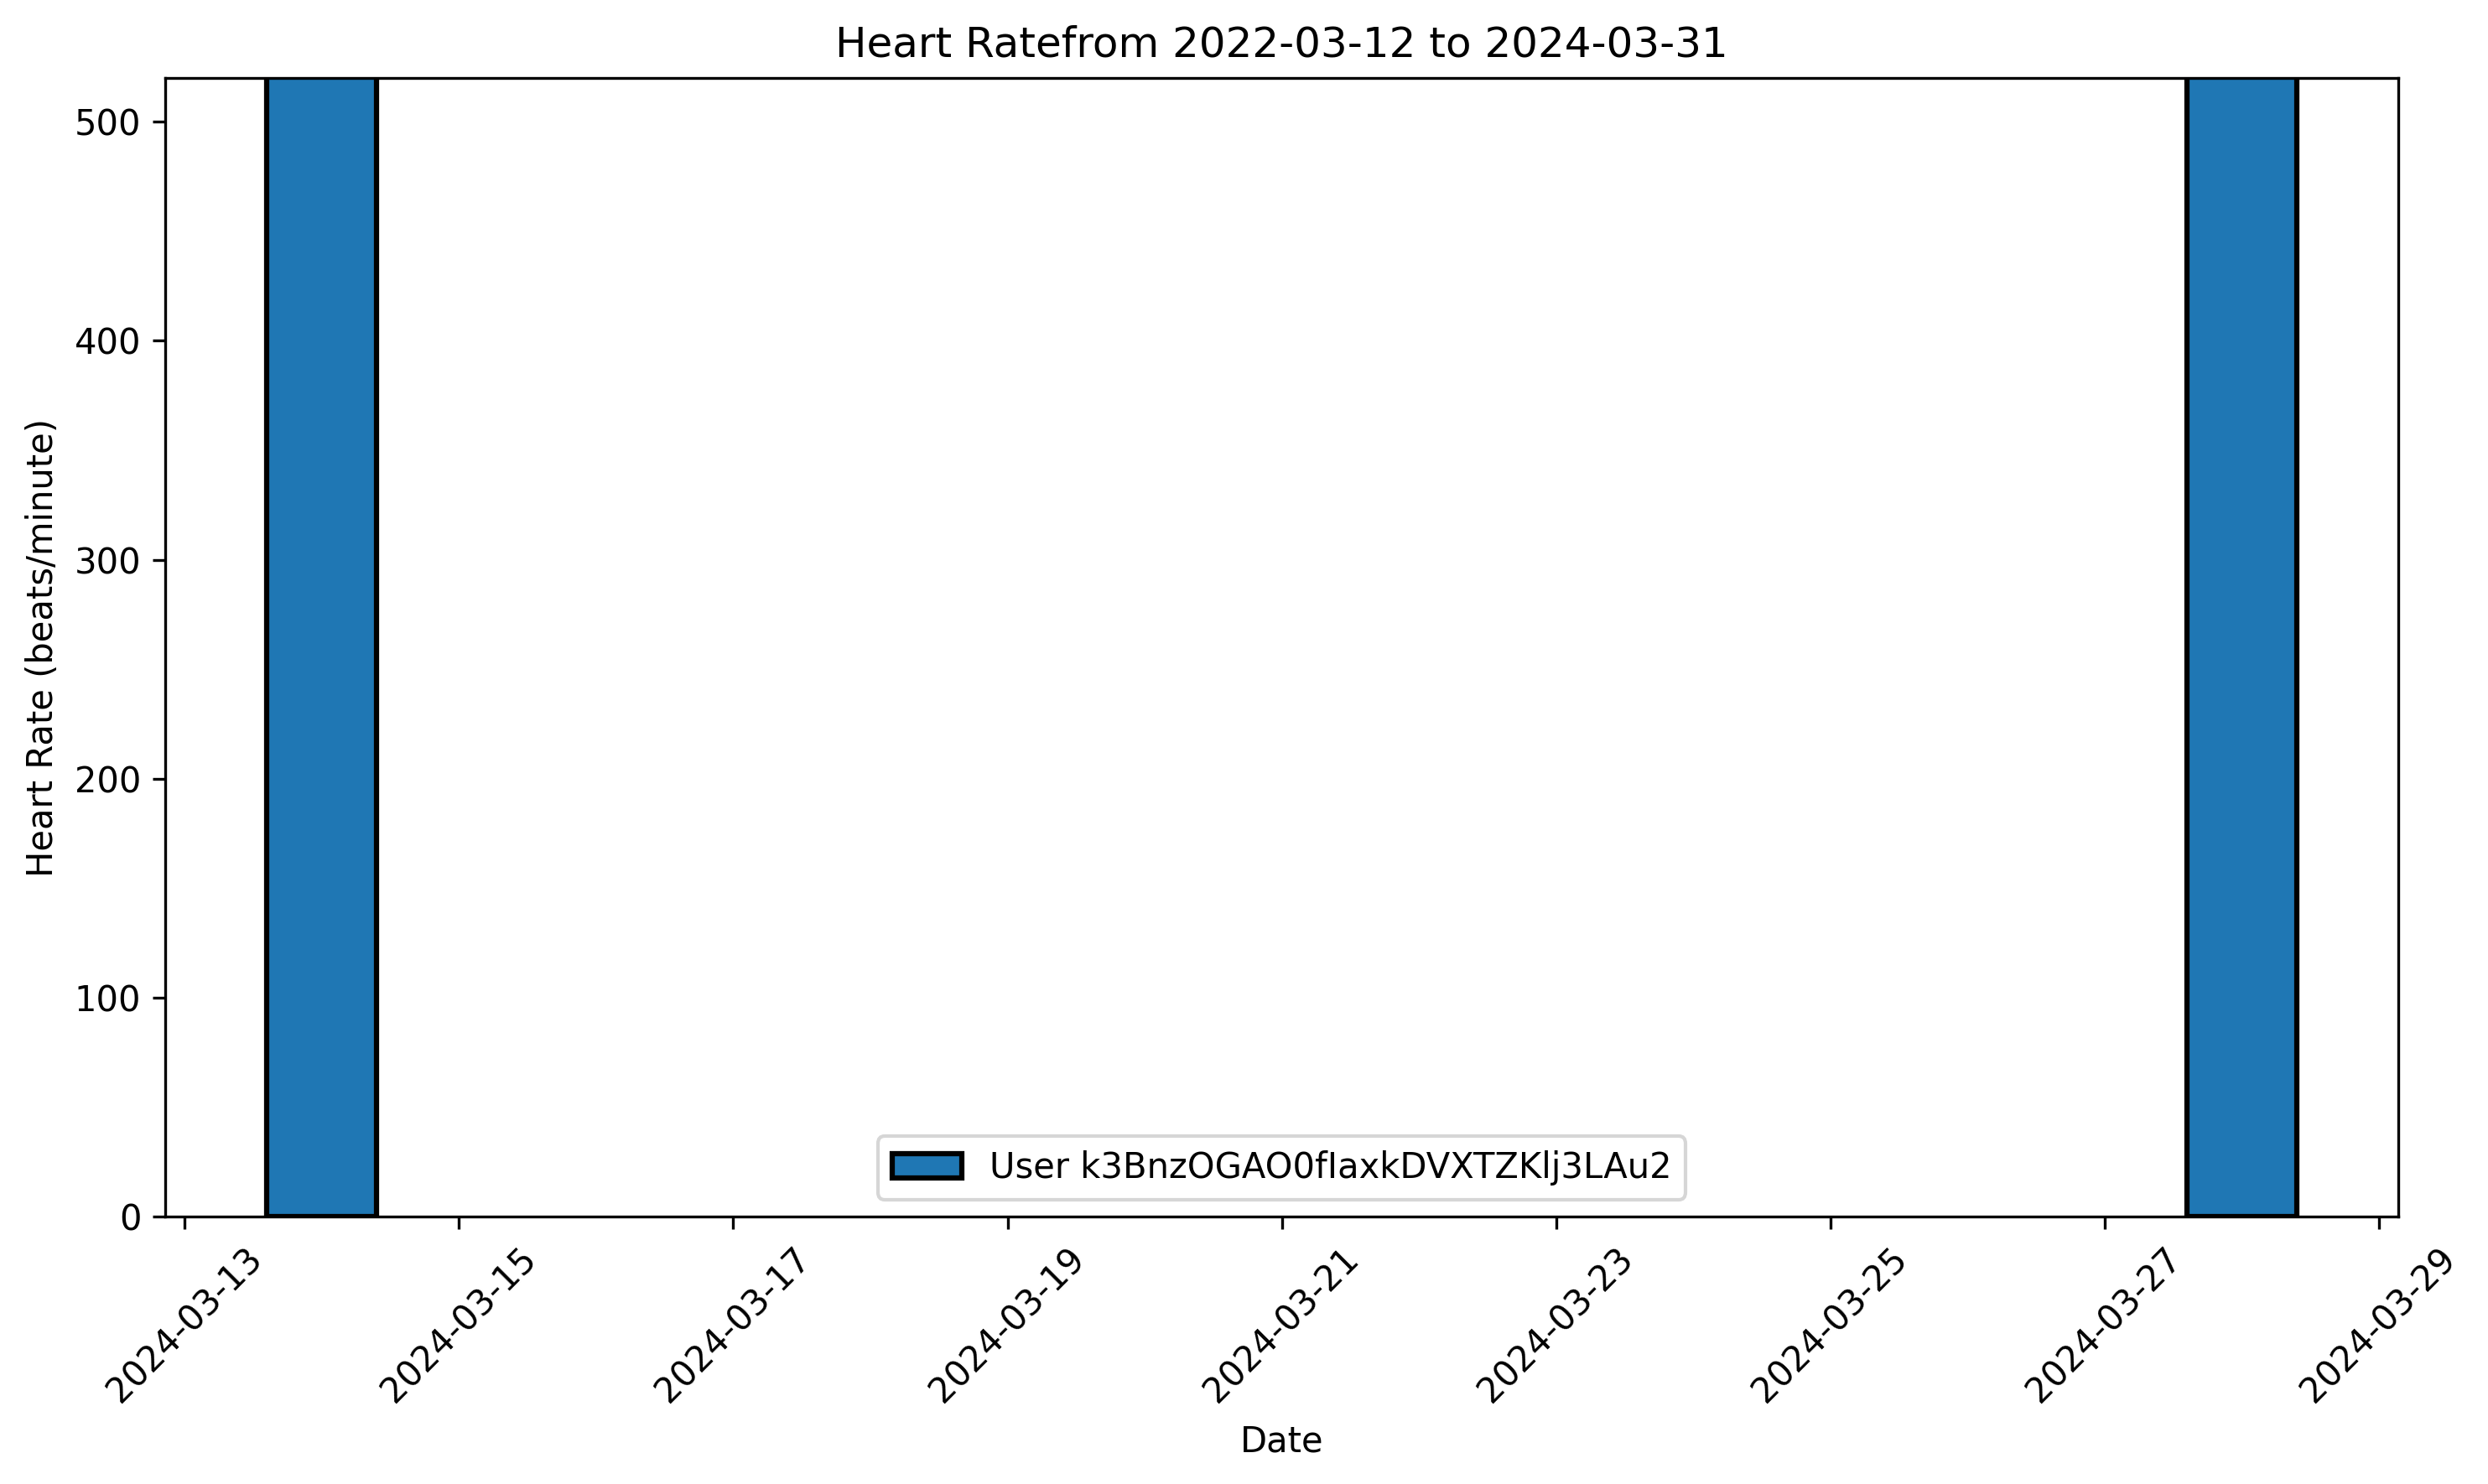

In [6]:
selected_users = ["k3BnzOGAO0fIaxkDVXTZKlj3LAu2"]  # Use None to plot data for all users
# selected_user = "3EUoHxIuYkWMKcnLfK38nTGOqHn1"
selected_start_date = "2022-03-12"
selected_end_date = "2024-03-31"
visualizer = visualizer_factory(processed_fhir_dataframe)

visualizer.set_user_ids(selected_users)
visualizer.set_date_range(selected_start_date, selected_end_date)
visualizer.set_y_bounds(0, 520)

fig = visualizer.create_static_plot(processed_fhir_dataframe)

### ECG Recording Example

In [ ]:
selected_user = "3EUoHxIuYkWMKcnLfK38nTGOqHn1"
selected_start_date = "2023-03-12"
selected_end_date = "2023-03-31"
visualizer = visualizer_factory(processed_fhir_dataframe)

fig = visualizer.plot_ecg_subplots(processed_fhir_dataframe, selected_user, effective_datetime=selected_start_date)

## Export data

                         UserId EffectiveDateTime NumberOfMeasurements  \
1  3EUoHxIuYkWMKcnLfK38nTGOqHn1        2023-03-15              15360.0   
3  3EUoHxIuYkWMKcnLfK38nTGOqHn1        2023-03-15              15360.0   
5  3EUoHxIuYkWMKcnLfK38nTGOqHn1        2023-03-15              15360.0   

  SamplingFrequency SamplingFrequencyUnit ElectrocardiogramClassification  \
1             512.0                 hertz                     sinusRhythm   
3             512.0                 hertz                     sinusRhythm   
5             512.0                 hertz                     sinusRhythm   

  HeartRate HeartRateUnit            LoincCode            Display  \
1      81.0  beats/minute  HKElectrocardiogram  Electrocardiogram   
3      93.0  beats/minute  HKElectrocardiogram  Electrocardiogram   
5     126.0  beats/minute  HKElectrocardiogram  Electrocardiogram   

  AppleHealthKitCode       QuantityName  \
1             131328  MDC_ECG_ELEC_POTL   
3             131328  MDC_ECG_E

AttributeError: 'NoneType' object has no attribute 'split'

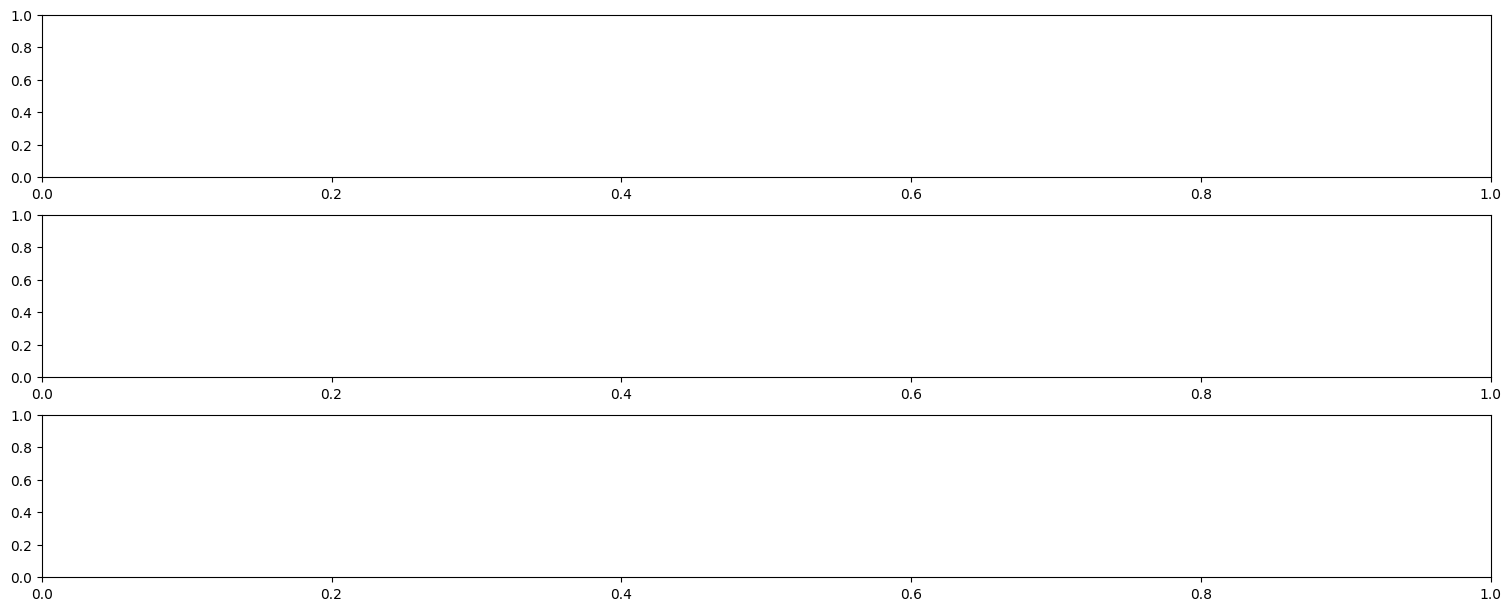

In [8]:
selected_user = "3EUoHxIuYkWMKcnLfK38nTGOqHn1"
selected_start_date = "2023-03-15"

exporter = DataExporter(processed_fhir_dataframe)

exporter.set_user_ids(selected_user)
exporter.set_date_range(selected_start_date, "2024-12-31")
# exporter.set_date_range(selected_start_date, selected_start_date)
# exporter.set_y_bounds(50, 700)
exporter.create_and_save_plot("data_plot.tif") 
